<a href="https://colab.research.google.com/github/higebobo/my-colab/blob/main/fisco_stock_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 出来た株・動いた株

* [出来た株・動いた株](https://market.fisco.co.jp/update/analysis/kabu.jsp)
* [【Python】Google ColaboratoryでSelenium実行｜ゆゆうブログ](https://yuyuublog.com/colaboratoryselenium/)

## Text version

### Install

In [13]:
!apt-get update
!apt install chromium-chromedriver
!pip install pip --upgrade
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-upda

### Import

In [14]:
import re

from IPython.display import HTML, display
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

### Define variables

In [15]:
wait = 1
url = 'https://market.fisco.co.jp/update/analysis/kabu.jsp'

pattern = '\*(.+)<(\d{4})>\s(\d+)\s(.+\d+)\n(.+)'
rc = re.compile(pattern, re.MULTILINE | re.DOTALL)

# yahoo finance
stock_base_url = 'https://finance.yahoo.co.jp/quote/'
"""
chart_base_url = 'https://chart.yahoo.co.jp/'

# size: a,b,c
chart_size = 'c'
# tm: 1d,5d,1m,3m,6m,1y,2y,5y,10y,20y
chart_term = '6m'
"""
chart_base_url = 'https://finance.yahoo.co.jp/chart-image-proxy/ex/v1/common/chart/image/'

### Initialize

In [16]:
options = webdriver.ChromeOptions()
options.desired_capabilities = DesiredCapabilities.CHROME
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver', options=options)
driver.implicitly_wait(wait)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


### Get data

In [ ]:
driver.get(url)

elem = driver.find_element(By.ID, 'ugodeki_uptime')
date_text = elem.text

elem = driver.find_element(By.ID, 'ugodeki')

word_list = re.findall(pattern, elem.text)

### Add information and sort

In [ ]:
word_list_updated = list()

for x in word_list:
    if x[3].startswith('+'):
        color = '#090'
        ratio = float(x[3]) / (float(x[2]) - float(x[3])) * 100
    elif x[3].startswith('-'):
        color = '#900'
        ratio = float(x[3]) / (float(x[2]) - float(x[3])) * 100
    else:
        color = '#000'
        ratio = 0
    word_list_updated.append(x + (color, ratio))

word_list_updated.sort(key=lambda x: x[6], reverse=True)

### Output

In [19]:
output = '<h1>(フィスコ)出来た株・動いた株</h1>'
output += f'<h2>{date_text}</h2>'

output += '''
<table>
  <thead>
    <tr>
      <th>コード</th>
      <th>銘柄</th>
      <th>株価</th>
      <th colspan="2">変動価格</th>
      <th>コメント</th>
    </tr>
  </thead>
  <tfoot></tfoot>
  <tbody>
'''

for x in word_list_updated:
    output += f'''
        <tr>
          <td><a href="{stock_base_url}{x[1]}.T" target="_blank">{x[1]}</a></td>
          <td>{x[0]}</td>
          <td style="text-align: right;">{int(x[2]):,}円</td>
          <td style="color: {x[5]}; text-align: right">{x[3]}円</td>
          <td style="color: {x[5]}; text-align: right">{x[6]:1.2f}%</td>
          <td>{x[4]}</td>
        </tr>
    '''

output += '''
  </tbody>
</table>
'''
display(HTML(output))

## Chart version

### Output

In [20]:
output = '<h1>(フィスコ)出来た株・動いた株</h1>'
output += f'<h2>{date_text}</h2>'

output += '''
<table>
  <thead>
    <tr>
      <th>銘柄情報</th>
      <th>チャート</th>
    </tr>
  </thead>
  <tfoot></tfoot>
  <tbody>
'''

for x in word_list_updated:
    stock_url = f'{stock_base_url}{x[1]}.T'
    # chart_url = f'{chart_base_url}?code={x[1]}.T&tm={chart_term}&size={chart_size}'
    chart_url = f'{chart_base_url}?code={x[1]}&chartSize=290x140'

    output += f'''
        <tr>
          <td>
            <ul>
              <li><a href="{stock_url}" target="_blank">{x[1]}&nbsp;{x[0]}</a></li>
              <li>{x[2]}円&nbsp;<span style="color: {x[5]}">{x[3]}円({x[6]:1.2f}%)</span></li>
              <li>{x[4]}</li>
            </ul>            
          </td>
          <td><a href="{stock_url}" target="_blank"><img src="{chart_url}" /></a></td>
        </tr>
    '''

output += '''
  </tbody>
</table>
'''
display(HTML(output))

銘柄情報,チャート
3856 Ａｂａｌａｎｃｅ 2826円 +481円(20.51%) 通期業績予想を上方修正している。,
9274 ＫＰＰＧＨＤ 957円 +150円(18.59%) 通期業績予想を大幅に上方修正。,
2388 ウェッジＨＤ 156円 +24円(18.18%) 22年9月期の純損益は黒字転換、営業外費用や特別損失減少。,
6355 住友精密 3645円 +550円(17.77%) 住友商事のTOB価格3650円にサヤ寄せ続く。,
4977 新田ゼラチン 1077円 +146円(15.68%) 上半期大幅上振れ着地で通期予想を上方修正。,
5036 日本ビジネスシステムズ 3965円 +510円(14.76%) 今期大幅増益見通しを引き続き買い材料視。,
4071 プラスアルファ 2859円 +336円(13.32%) 23年9月期の営業利益は前期比27.6％増の34億円、配当も4円の増配となる13円に。,
6254 野村マイクロ・サイエンス 4465円 +515円(13.04%) 上半期減益決算もコンセンサスを上回る。,
6614 シキノハイテック 2526円 +286円(12.77%) 半導体関連周辺の中小型株として物色へ。,
4376 くふうカンパニー 583円 +66円(12.77%) 23年9月期営業利益28％増の予想。,


## Alternative chart version

### Import section

In [21]:
import base64
from io import BytesIO

from PIL import Image

### Output

**NOTE: It takes about 3 minutes**

**注意: 処理時間が3分近くかかる**

銘柄情報,チャート
3856 Ａｂａｌａｎｃｅ 2826円 +481円(20.51%) 通期業績予想を上方修正している。,
9274 ＫＰＰＧＨＤ 957円 +150円(18.59%) 通期業績予想を大幅に上方修正。,
2388 ウェッジＨＤ 156円 +24円(18.18%) 22年9月期の純損益は黒字転換、営業外費用や特別損失減少。,
6355 住友精密 3645円 +550円(17.77%) 住友商事のTOB価格3650円にサヤ寄せ続く。,
4977 新田ゼラチン 1077円 +146円(15.68%) 上半期大幅上振れ着地で通期予想を上方修正。,
5036 日本ビジネスシステムズ 3965円 +510円(14.76%) 今期大幅増益見通しを引き続き買い材料視。,
4071 プラスアルファ 2859円 +336円(13.32%) 23年9月期の営業利益は前期比27.6％増の34億円、配当も4円の増配となる13円に。,
6254 野村マイクロ・サイエンス 4465円 +515円(13.04%) 上半期減益決算もコンセンサスを上回る。,
6614 シキノハイテック 2526円 +286円(12.77%) 半導体関連周辺の中小型株として物色へ。,
4376 くふうカンパニー 583円 +66円(12.77%) 23年9月期営業利益28％増の予想。,

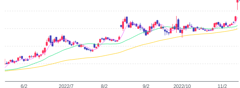
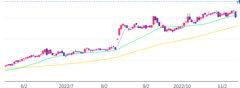
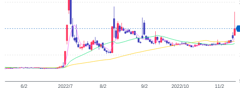
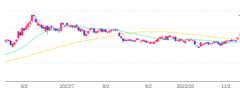
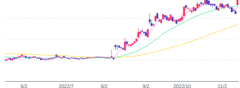
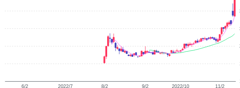
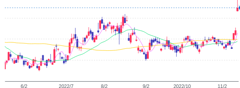
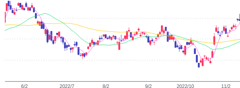
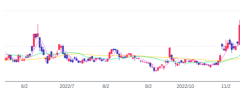
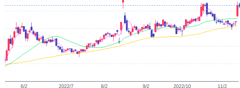
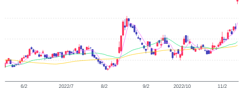
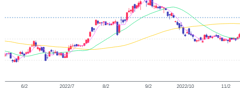
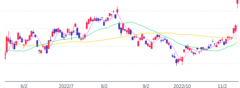
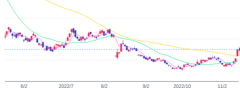
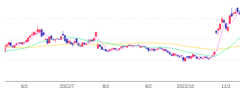
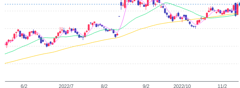
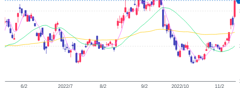
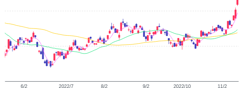
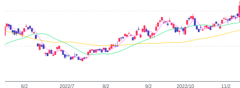
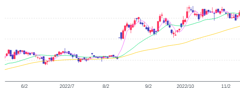
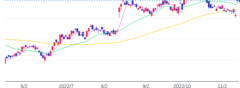
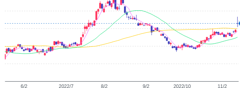
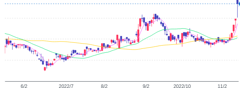
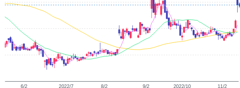
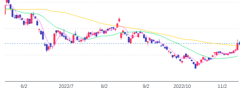
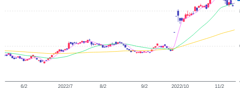
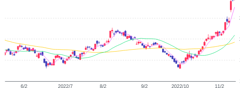
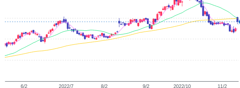
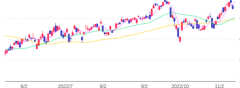
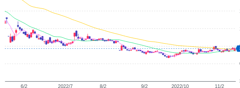
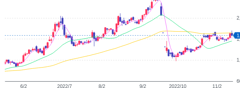
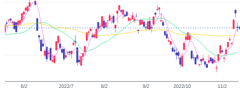
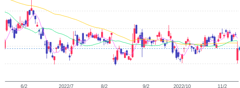
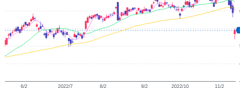
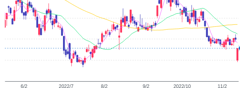
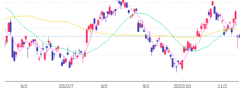
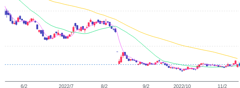
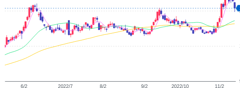
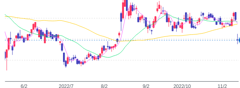
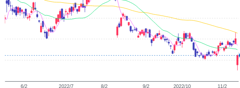
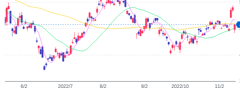
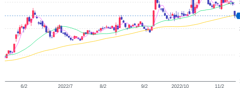
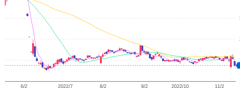
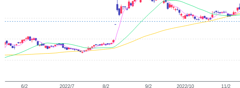
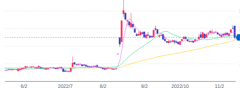
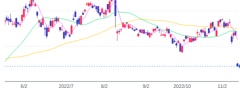
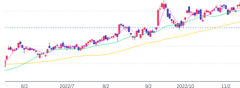
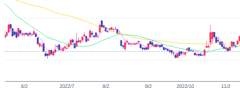
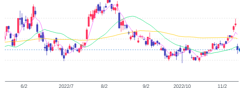
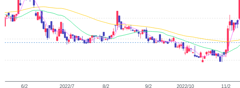
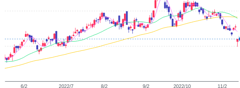
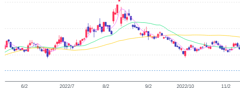
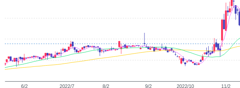
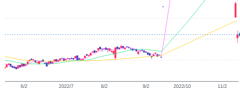
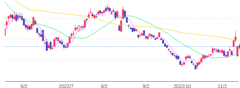
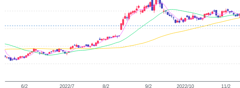
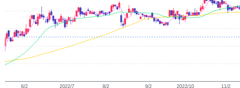
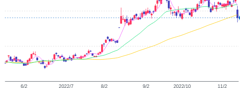
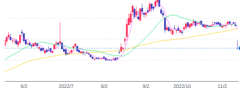
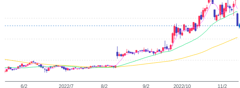
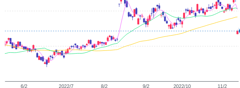

In [22]:
output = '<h1>(フィスコ)出来た株・動いた株</h1>'
output += f'<h2>{date_text}</h2>'

output += '''
<table>
  <thead>
    <tr>
      <th>銘柄情報</th>
      <th>チャート</th>
    </tr>
  </thead>
  <tfoot></tfoot>
  <tbody>
'''

for x in word_list_updated:
    # break
    stock_url = f'https://finance.yahoo.co.jp/quote/{x[1]}.T'
    chart_url = f'{stock_url}/chart'
    driver.get(chart_url)
    # ここと
    driver.execute_script("window.scrollTo(0, 480);")
    png = driver.get_screenshot_as_png()
    im = Image.open(BytesIO(png))
    # ここの値はトライアンドエラー
    im = im.crop((8, 320, 606, 540))
    im.thumbnail(size=(240, 240) )
    buffer = BytesIO()
    im.save(buffer, 'PNG')
    img = base64.b64encode(buffer.getvalue()).decode("ascii")

    output += f'''
        <tr>
          <td>
            <ul>
              <li><a href="{stock_url}" target="_blank">{x[1]}&nbsp;{x[0]}</a></li>
              <li>{x[2]}円&nbsp;<span style="color: {x[5]}">{x[3]}円({x[6]:1.2f}%)</span></li>
              <li>{x[4]}</li>
            </ul>            
          </td>
          <td><a href="{chart_url}" target="_blank"><img src="data:image/png;base64,{img}" /></a></td>
        </tr>
    '''

output += '''
  </tbody>
</table>
'''
display(HTML(output))